<a href="https://colab.research.google.com/github/mnslarcher/critical-facts-that-every-data-scientist-should-know/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Critical Facts That Every Data Scientist Should Know - Part 1

In [1]:
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from numpy.typing import ArrayLike
from sklearn.datasets import make_blobs
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from typing_extensions import TypedDict

np.random.seed(42)

## Do You Really Want to Maximize Accuracy?

In [2]:
X_train, y_train = make_blobs(n_samples=[1000, 1000], centers=[[0, 0], [1, 1]])
X_test, y_test = make_blobs(n_samples=[1000, 100], centers=[[0, 0], [1, 1]])

dc = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
lr = LogisticRegression().fit(X_train, y_train)

dc_pred = dc.predict(X_test)
lr_pred = lr.predict(X_test)

dc_accuracy = accuracy_score(y_test, dc_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"DummyClassifier accuracy: {100 * dc_accuracy:.2f}%")
print(f"LogisticRegression accuracy: {100 * lr_accuracy:.2f}%")

DummyClassifier accuracy: 90.91%
LogisticRegression accuracy: 77.82%


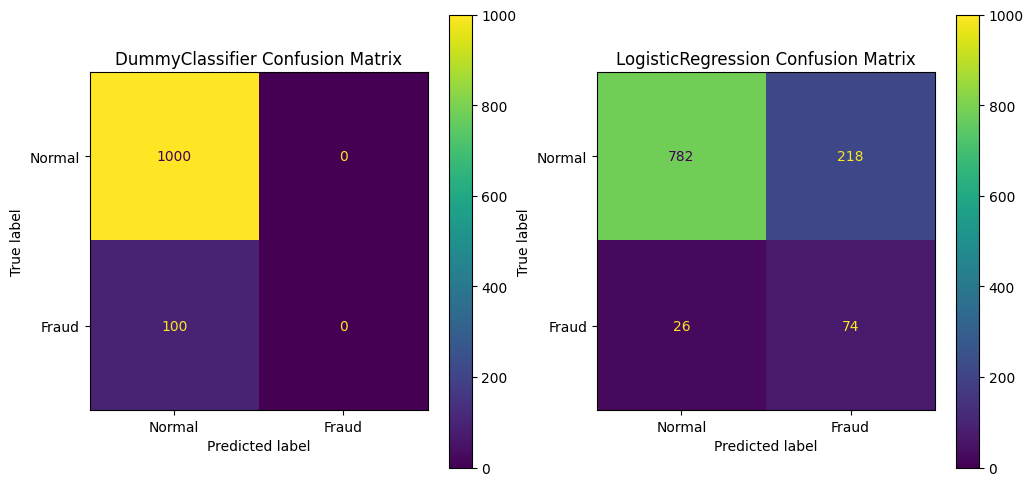

In [3]:
lr_cm = confusion_matrix(y_test, lr_pred)
dc_cm = confusion_matrix(y_test, dc_pred)

LABELS = ["Normal", "Fraud"]

lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=LABELS)
dc_disp = ConfusionMatrixDisplay(confusion_matrix=dc_cm, display_labels=LABELS)

plt.figure(figsize=(12, 6), dpi=100)

ax = plt.subplot(121)
plt.title("DummyClassifier Confusion Matrix")
dc_disp.plot(ax=ax)
dc_disp.im_.set_clim(0, 1000)

ax = plt.subplot(122)
plt.title("LogisticRegression Confusion Matrix")
lr_disp.plot(ax=ax)
lr_disp.im_.set_clim(0, 1000)

plt.savefig("fig1.png")
plt.show()

In [4]:
dc_precision = precision_score(y_test, dc_pred, zero_division=0)
dc_recall = recall_score(y_test, dc_pred)
dc_f1 = f1_score(y_test, dc_pred, zero_division=0)
print(f"DummyClassifier precision: {100 * dc_precision:.2f}%")
print(f"DummyClassifier recall: {100 * dc_recall:.2f}%")
print(f"DummyClassifier F1-score: {100 * dc_f1:.2f}%\n")

lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
print(f"LogisticRegression precision: {100 * lr_precision:.2f}%")
print(f"LogisticRegression recall: {100 * lr_recall:.2f}%")
print(f"LogisticRegression F1-score: {100 * lr_f1:.2f}%")

DummyClassifier precision: 0.00%
DummyClassifier recall: 0.00%
DummyClassifier F1-score: 0.00%

LogisticRegression precision: 25.34%
LogisticRegression recall: 74.00%
LogisticRegression F1-score: 37.76%


## What Happens to Precision When the Class of Interest Becomes Less Frequent

In [5]:
def specificity_score(y_true: ArrayLike, y_pred: ArrayLike) -> float:
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    true_negative = ((y_true == 0) & (y_pred == 0)).sum()
    negative = (y_true == 0).sum()
    return true_negative / negative


def gmean_score(y_true: ArrayLike, y_pred: ArrayLike) -> float:
    sensitivity = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return np.sqrt(sensitivity * specificity)


class MetricsDict(TypedDict):
    precision: List[float]
    recall: List[float]
    specificity: List[float]
    f1: List[float]
    gmean: List[float]


def test(clf: LogisticRegression, n_samples: ArrayLike, num_runs: int) -> MetricsDict:
    metrics = {"precision": [], "recall": [], "specificity": [], "gmean": [], "f1": []}
    for _ in range(num_runs):
        X_test, y_test = make_blobs(n_samples=n_samples, centers=[[0, 0], [1, 1]])
        y_pred = clf.predict(X_test)
        metrics["precision"].append(precision_score(y_test, y_pred))
        metrics["recall"].append(recall_score(y_test, y_pred))
        metrics["specificity"].append(specificity_score(y_test, y_pred))
        metrics["f1"].append(f1_score(y_test, y_pred))
        metrics["gmean"].append(gmean_score(y_test, y_pred))

    return metrics


NUM_RUNS = 100

In [6]:
X_train, y_train = make_blobs(n_samples=[1000, 1000], centers=[[0, 0], [1, 1]])

clf = LogisticRegression().fit(X_train, y_train)

### Class Distribution 1:1

In [7]:
metrics = test(clf, (100, 100), NUM_RUNS)

precision_mean = np.mean(metrics["precision"])
recall_mean = np.mean(metrics["recall"])
f1_mean = np.mean(metrics["f1"])

precision_std = np.std(metrics["precision"])
recall_std = np.std(metrics["recall"])
f1_std = np.std(metrics["f1"])

print(f"Precision: {100 * precision_mean:.2f}% ± {100 * precision_std:.2f}% (mean ± std. dev. of {NUM_RUNS} runs)")
print(f"Recall: {100 * recall_mean:.2f}% ± {100 * recall_std:.2f}% (mean ± std. dev. of {NUM_RUNS} runs)")
print(f"F1-Score: {100 * f1_mean:.2f}% ± {100 * f1_std:.2f}% (mean ± std. dev. of {NUM_RUNS} runs)")

Precision: 75.92% ± 3.52% (mean ± std. dev. of 100 runs)
Recall: 75.97% ± 4.79% (mean ± std. dev. of 100 runs)
F1-Score: 75.87% ± 3.42% (mean ± std. dev. of 100 runs)


### Class Distribution 100:1

In [8]:
metrics = test(clf, (10000, 100), NUM_RUNS)

precision_mean = np.mean(metrics["precision"])
recall_mean = np.mean(metrics["recall"])
f1_mean = np.mean(metrics["f1"])

precision_std = np.std(metrics["precision"])
recall_std = np.std(metrics["recall"])
f1_std = np.std(metrics["f1"])

print(f"Precision: {100 * precision_mean:.2f}% ± {100 * precision_std:.2f}% (mean ± std. dev. of {NUM_RUNS} runs)")
print(f"Recall: {100 * recall_mean:.2f}% ± {100 * recall_std:.2f}% (mean ± std. dev. of {NUM_RUNS} runs)")
print(f"F1-Score: {100 * f1_mean:.2f}% ± {100 * f1_std:.2f}% (mean ± std. dev. of {NUM_RUNS} runs)")

Precision: 3.04% ± 0.17% (mean ± std. dev. of 100 runs)
Recall: 75.88% ± 4.42% (mean ± std. dev. of 100 runs)
F1-Score: 5.84% ± 0.33% (mean ± std. dev. of 100 runs)


## Metrics for Imbalanced Classification

### Class Distribution 1:1

In [9]:
metrics = test(clf, (100, 100), NUM_RUNS)

sensitivity_mean = np.mean(metrics["recall"])
specificity_mean = np.mean(metrics["specificity"])
gmean_mean = np.mean(metrics["gmean"])

sensitivity_std = np.std(metrics["recall"])
specificity_std = np.std(metrics["specificity"])
gmean_std = np.std(metrics["gmean"])

print(f"Sensitivity: {100 * sensitivity_mean:.2f}% ± {100 * sensitivity_std:.2f}% (mean ± std. dev. of {NUM_RUNS} runs)")
print(f"Specificity: {100 * specificity_mean:.2f}% ± {100 * specificity_std:.2f}% (mean ± std. dev. of {NUM_RUNS} runs)")
print(f"G-mean: {100 * gmean_mean:.2f}% ± {100 * gmean_std:.2f}% (mean ± std. dev. of {NUM_RUNS} runs)")

Sensitivity: 76.20% ± 4.84% (mean ± std. dev. of 100 runs)
Specificity: 76.05% ± 4.38% (mean ± std. dev. of 100 runs)
G-mean: 76.05% ± 3.22% (mean ± std. dev. of 100 runs)


### Class Distribution 100:1

In [10]:
metrics = test(clf, (10000, 100), NUM_RUNS)

sensitivity_mean = np.mean(metrics["recall"])
specificity_mean = np.mean(metrics["specificity"])
gmean_mean = np.mean(metrics["gmean"])

sensitivity_std = np.std(metrics["recall"])
specificity_std = np.std(metrics["specificity"])
gmean_std = np.std(metrics["gmean"])

print(f"Sensitivity: {100 * sensitivity_mean:.2f}% ± {100 * sensitivity_std:.2f}% (mean ± std. dev. of {NUM_RUNS} runs)")
print(f"Specificity: {100 * specificity_mean:.2f}% ± {100 * specificity_std:.2f}% (mean ± std. dev. of {NUM_RUNS} runs)")
print(f"G-mean: {100 * gmean_mean:.2f}% ± {100 * gmean_std:.2f}% (mean ± std. dev. of {NUM_RUNS} runs)")

Sensitivity: 75.69% ± 4.12% (mean ± std. dev. of 100 runs)
Specificity: 75.68% ± 0.41% (mean ± std. dev. of 100 runs)
G-mean: 75.65% ± 2.08% (mean ± std. dev. of 100 runs)
